In [1]:
from data_loader.rectangles import RectanglesDataLoader
from model import feature_extractor
from model import descriptor
from model import decoder
from torch.optim import Adam
from model import vasf
import torch
from trainer import trainer

dev = torch.device('cuda')

In [2]:
train_dl = RectanglesDataLoader((32,32),(0,2),(4,10), 128, 1)

In [3]:
m1 = feature_extractor.CNNFeatureExtractor(16)
m2 = descriptor.AutoregressiveMaskedDescriptor(16, 16, 16)
m3 = decoder.ImageGenerator(16, 16)
vasf_model = vasf.Vasf(m1, m2, m3).float()

In [4]:
from utils.utils import count_parameters
count_parameters(vasf_model)

175204

In [5]:
optim = torch.optim.Adam(vasf_model.parameters(), lr=1e-4)

In [6]:
my_trainer = trainer.SimpleTrainer(train_dl, train_dl, vasf_model, optim, dev)

In [9]:
train_dl.set_attrs(None, (0, 1), (14,24))

0it [00:00, ?it/s]

iteration 500 avg loss: 0.0787
correct photo:


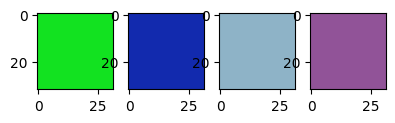

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.0397


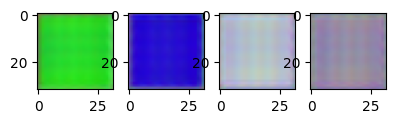

reconstructed by two tokens, mse: 0.032


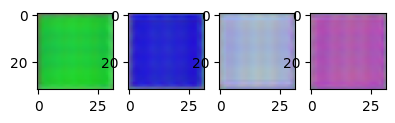

reconstructed by three tokens, , mse: 0.0326


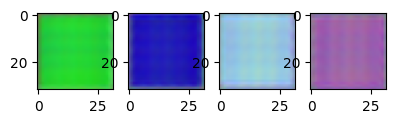

iteration 1000 avg loss: 0.0273
correct photo:


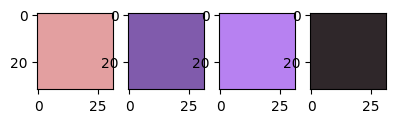

reconstructed by one token, mse: 0.0301


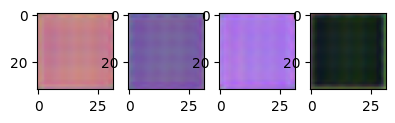

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.025


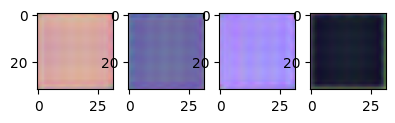

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.0219


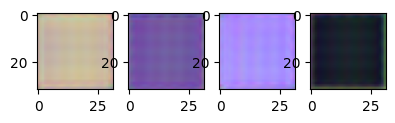

In [ ]:
my_trainer.train(1000, 500, 2)